In [13]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plot
from datetime import date
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [14]:
file = pd.read_csv("new_ifood_df.csv")
file.head()

,Unnamed: 0,ID,Income,Age,Education Status,Marital Status,Kidhome,Teenhome,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall
0,0,0,58138,63,Graduation,Single,0,0,58,635,...,0,0,0,3,11,1,2822,1529,1441,0
1,1,1,46344,66,Graduation,Single,1,1,38,11,...,0,0,0,3,11,0,2272,21,15,0
2,2,2,71613,55,Graduation,Together,0,0,26,426,...,0,0,0,3,11,0,2471,734,692,0
3,3,3,26646,36,Graduation,Together,1,0,26,11,...,0,0,0,3,11,0,2298,48,43,0
4,4,4,58293,39,PhD,Married,1,0,94,173,...,0,0,0,3,11,0,2320,407,392,0


C:\Users\gosho\AppData\Local\Temp\ipykernel_18048\3487172414.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


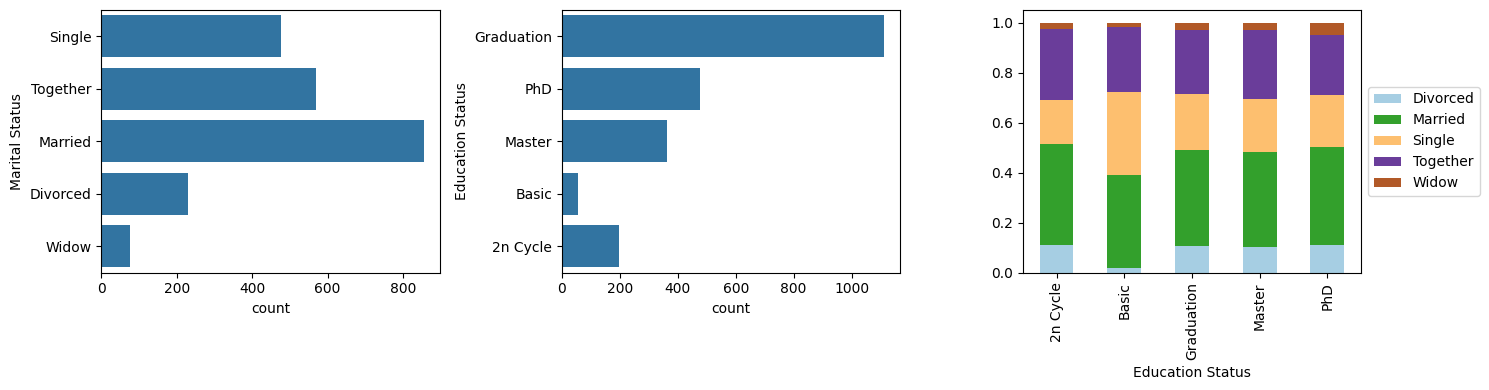

In [15]:

df = pd.DataFrame(file)

fig, x_ax = plot.subplots(1,3, figsize=(15,4))

sbn.countplot(file['Marital Status'], ax=x_ax[0])
sbn.countplot(file['Education Status'], ax=x_ax[1])

plt = file.groupby(['Marital Status', 'Education Status']).size().reset_index().pivot(columns='Marital Status', index='Education Status', values=0)
plt.apply(lambda x: x/x.sum(), axis=1).plot(kind='bar', stacked=True, ax=x_ax[2], colormap='Paired')

plot.legend(loc='center left', bbox_to_anchor=(1.0,0.5))
plot.tight_layout()

fig.show()

In [16]:
file

,Unnamed: 0,ID,Income,Age,Education Status,Marital Status,Kidhome,Teenhome,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall
0,0,0,58138,63,Graduation,Single,0,0,58,635,...,0,0,0,3,11,1,2822,1529,1441,0
1,1,1,46344,66,Graduation,Single,1,1,38,11,...,0,0,0,3,11,0,2272,21,15,0
2,2,2,71613,55,Graduation,Together,0,0,26,426,...,0,0,0,3,11,0,2471,734,692,0
3,3,3,26646,36,Graduation,Together,1,0,26,11,...,0,0,0,3,11,0,2298,48,43,0
4,4,4,58293,39,PhD,Married,1,0,94,173,...,0,0,0,3,11,0,2320,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2200,2200,61223,53,Graduation,Married,0,1,46,709,...,0,0,0,3,11,0,2540,1094,847,0
2201,2201,2201,64014,74,PhD,Together,2,1,56,406,...,1,0,0,3,11,0,2178,436,428,1
2202,2202,2202,56981,39,Graduation,Divorced,0,0,91,908,...,0,0,0,3,11,0,2314,1217,1193,1
2203,2203,2203,69245,64,Master,Together,0,1,8,428,...,0,0,0,3,11,0,2315,782,721,0


show percentage of web visits that turned into possible purchases? 

- is there a correlations between income and purchases? Where the purchases are made? What is purchased?

- does education or marital status affect anything?


In [17]:
col_to_move = df.pop('Age')
df.insert(2, 'Age', col_to_move)

df.to_csv('new_ifood_df.csv')

In [18]:
col_to_move = df.pop('education_Status')
df.insert(3, 'Education Status', col_to_move)



KeyboardInterrupt



In [9]:
df.to_csv('new_ifood_df.csv')

In [10]:
col_to_move = df.pop('marital_Status')
df.insert(4, 'Marital Status', col_to_move)

df.to_csv('new_ifood_df.csv')

In [11]:
df['AcceptedCmp1'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       0
4       0
       ..
2200    0
2201    1
2202    0
2203    0
2204    0
Name: AcceptedCmp1, Length: 2205, dtype: int64>

In [16]:
'''count = 0;
for i in df['AcceptedCmp1']:
    if i == 1 or i == '1':
        count += 1


print(count)'''

142


In [35]:
row_list = []

d = {}


new_df = pd.DataFrame()

new_df = df[(df[['Kidhome', 'Teenhome']] >= 1).all(axis=1)]

print(new_df)
        
       


      Unnamed: 0    ID  Age  Income Education Status Marital Status  Kidhome  \
1              1     1   66   46344       Graduation         Single        1   
9              9     9   70    5648              PhD       Together        1   
12            12    12   68   59354           Master       Divorced        1   
15            15    15   40   41850       Graduation        Married        1   
25            25    25   44   53359       Graduation        Married        1   
...          ...   ...  ...     ...              ...            ...      ...   
2190        2190  2190   57   33562           Master        Married        1   
2192        2192  2192   52   58554       Graduation       Together        1   
2193        2193  2193   41   63777       Graduation        Married        1   
2201        2201  2201   74   64014              PhD       Together        2   
2204        2204  2204   66   52869              PhD        Married        1   

      Teenhome  Recency  MntWines  ... 

In [45]:
row_list = []

d = {}


df['Education Status'] = df['Education Status'].astype('str')



for index, row in df.iterrows():
    if df['Education Status'].str.contains('PhD').any() or df['Education Status'].str.contains('Master').any() or df['Education Status'].str.contains('Graduation').any():
        
       

ID                              0
Income                      58138
Age                            63
Education Status       Graduation
Marital Status             Single
Kidhome                         0
Teenhome                        0
Recency                        58
MntWines                      635
MntFruits                      88
MntMeatProducts               546
MntFishProducts               172
MntSweetProducts               88
MntGoldProds                   88
NumDealsPurchases               3
NumWebPurchases                 8
NumCatalogPurchases            10
NumStorePurchases               4
NumWebVisitsMonth               7
AcceptedCmp3                    0
AcceptedCmp4                    0
AcceptedCmp5                    0
AcceptedCmp1                    0
AcceptedCmp2                    0
Complain                        0
Z_CostContact                   3
Z_Revenue                      11
Response                        1
Customer_Days                2822
MntTotal      